In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_excel('/content/compactiv.xlsx')

In [3]:
df.shape

(8192, 22)

In [4]:
df.head(3)

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [7]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [8]:
df.describe()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.088000e+03,8.177000e+03,8192.000000,...,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8192.000000
mean,19.559692,13.106201,2306.318237,210.479980,150.058228,1.884554,2.791998,1.973857e+05,9.590299e+04,2.285317,...,11.919712,21.526849,1.127505,8.277960,12.388586,109.793799,185.315796,1763.456299,1.328126e+06,83.968872
std,53.353799,29.891726,1633.617322,198.980146,160.478980,2.479493,5.212456,2.398375e+05,1.408417e+05,5.307038,...,32.363520,71.141340,5.708347,13.874978,22.281318,114.419221,191.000603,2482.104511,4.220194e+05,18.401905
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,55.000000,2.000000e+00,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,3.409150e+04,2.291600e+04,0.000000,...,0.000000,0.000000,0.000000,0.600000,0.600000,25.000000,45.400000,231.000000,1.042624e+06,81.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,1.254735e+05,4.661900e+04,0.000000,...,0.000000,0.000000,0.000000,2.800000,3.800000,63.800000,120.400000,579.000000,1.289290e+06,89.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,2.678288e+05,1.061010e+05,2.400000,...,5.000000,0.000000,0.600000,9.765000,13.800000,159.600000,251.800000,2002.250000,1.730380e+06,94.000000
max,1845.000000,575.000000,12493.000000,5318.000000,5456.000000,20.120000,59.560000,2.526649e+06,1.801623e+06,81.440000,...,523.000000,1237.000000,211.580000,141.200000,292.610000,899.800000,1365.000000,12027.000000,2.243187e+06,99.000000


In [9]:
for i in df.columns:
  count = (df[i] == 0).sum()
  print(i,count)

lread 675
lwrite 2684
scall 0
sread 0
swrite 0
fork 21
exec 21
rchar 0
wchar 0
pgout 4878
ppgout 4878
pgfree 4869
pgscan 6448
atch 4575
pgin 1220
ppgin 1220
pflt 3
vflt 0
runqsz 0
freemem 0
freeswap 0
usr 283


In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

21

In [13]:
(df_num.columns)

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [14]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [15]:
features=['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr']

In [16]:
list(enumerate(features))

[(0, 'lread'),
 (1, 'lwrite'),
 (2, 'scall'),
 (3, 'sread'),
 (4, 'swrite'),
 (5, 'fork'),
 (6, 'exec'),
 (7, 'rchar'),
 (8, 'wchar'),
 (9, 'pgout'),
 (10, 'ppgout'),
 (11, 'pgfree'),
 (12, 'pgscan'),
 (13, 'atch'),
 (14, 'pgin'),
 (15, 'ppgin'),
 (16, 'pflt'),
 (17, 'vflt'),
 (18, 'freemem'),
 (19, 'freeswap'),
 (20, 'usr')]

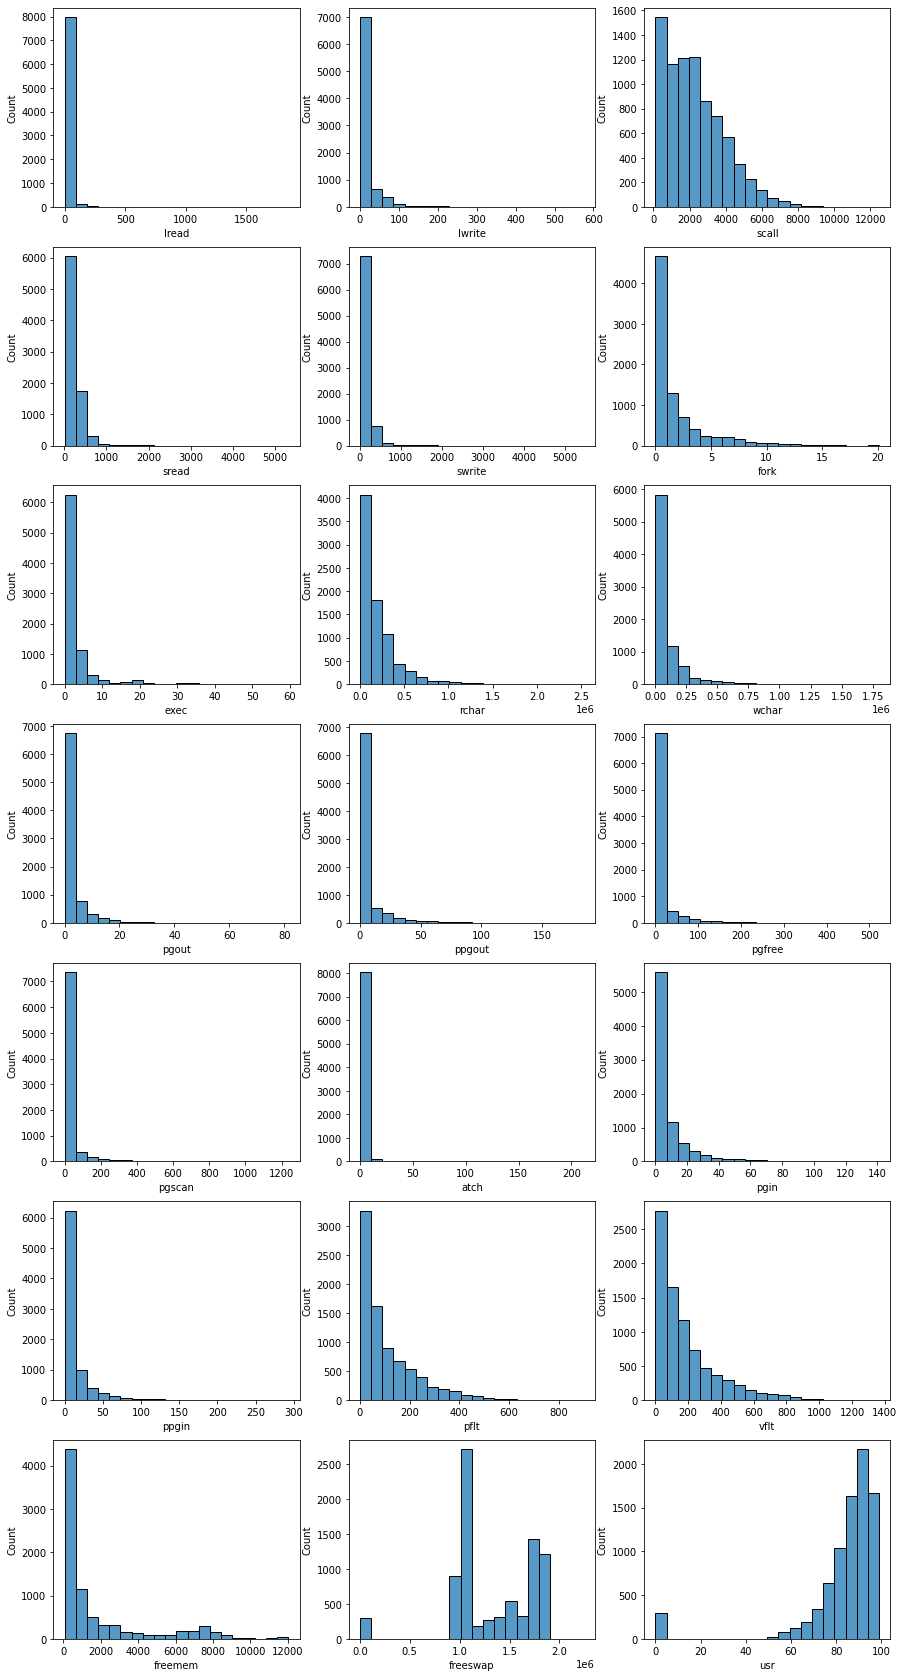

In [17]:
plt.figure(figsize=(15,30))
for i in enumerate(features):
  plt.subplot(7,3,i[0]+1)
  sns.histplot(data=df_num, x=i[1],kde=False,bins=20)




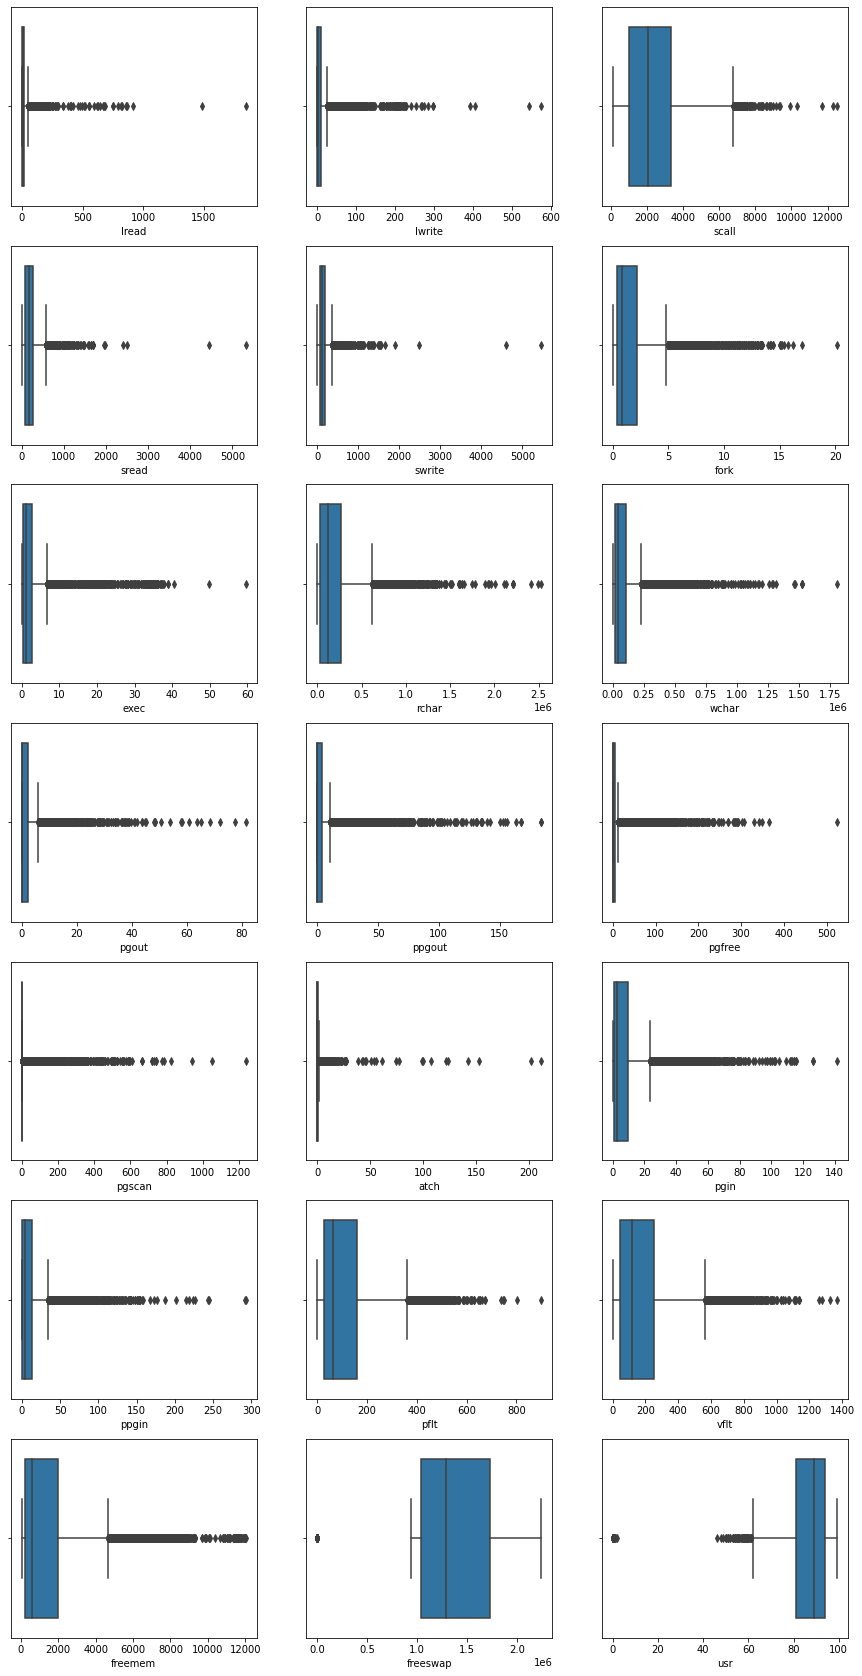

In [18]:
plt.figure(figsize=(15,30))
for i in enumerate(features):
  plt.subplot(7,3,i[0]+1)
  sns.boxplot(data=df, x=i[1])

In [19]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

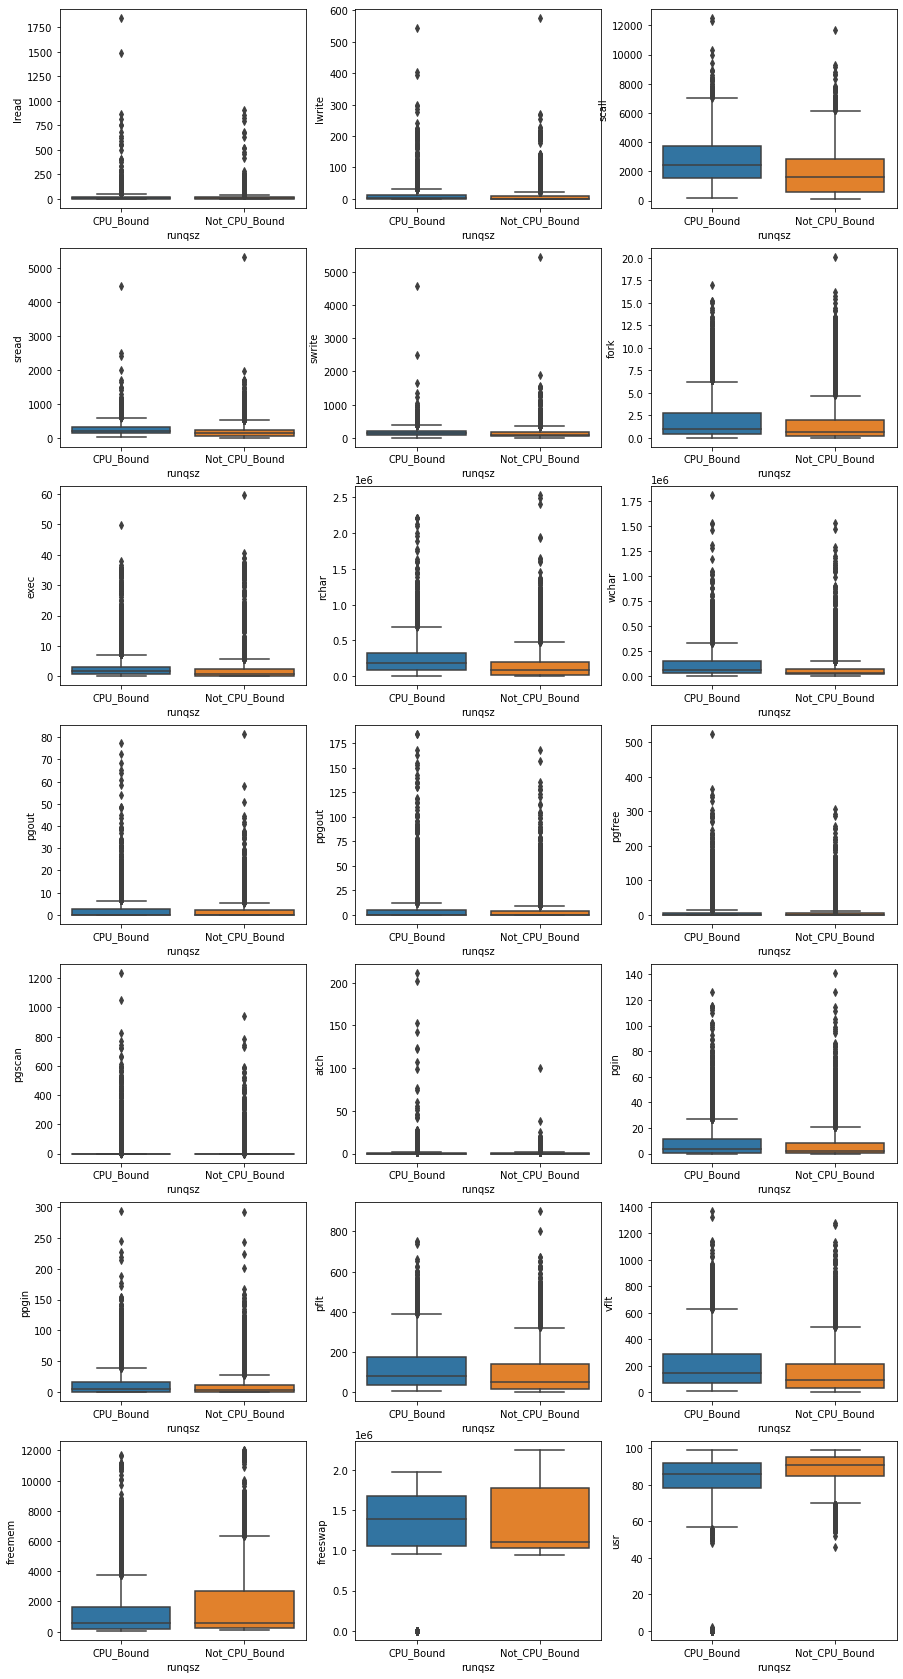

In [20]:
plt.figure(figsize=(15,30))
for i in enumerate(features):
  plt.subplot(7,3,i[0]+1)
  sns.boxplot(data=df, x='runqsz', y=i[1])

<AxesSubplot:xlabel='runqsz', ylabel='count'>

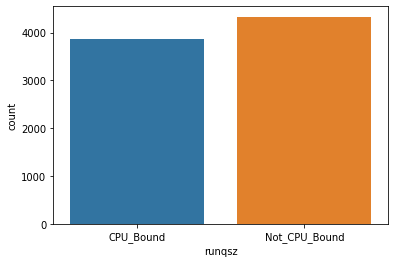

In [21]:
sns.countplot(data=df, x='runqsz')

In [22]:
sns.pairplot(data=df)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8d4db390d0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8d4db34f70> (for post_execute):


KeyboardInterrupt: ignored

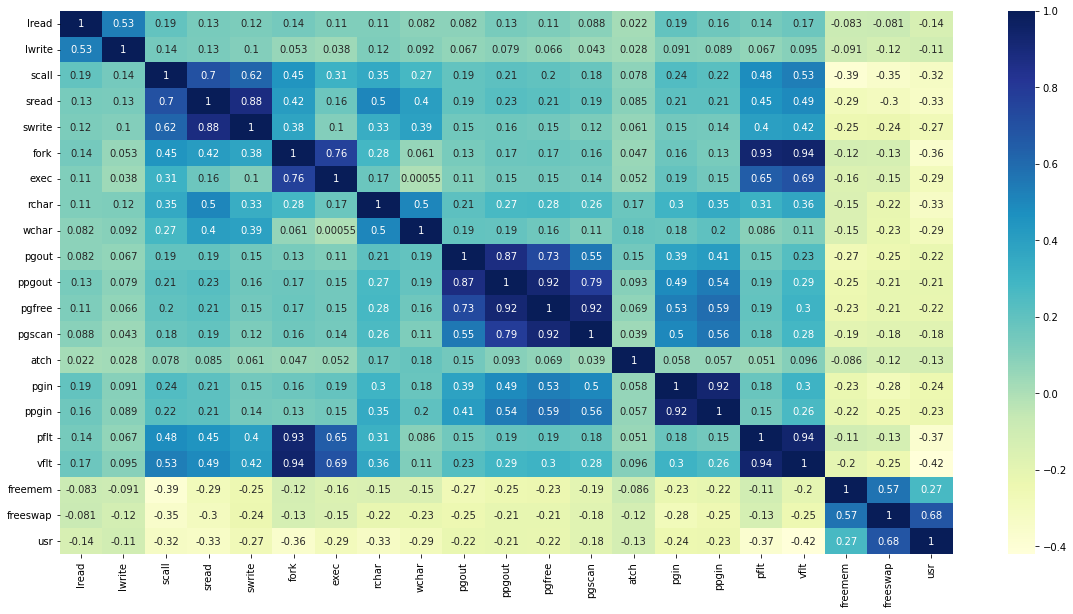

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True, cmap='YlGnBu');

In [24]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [25]:
df.drop(['pgout','ppgout','pgfree','pgscan','atch','lwrite'],axis=1,inplace=True)

In [26]:
for i in df.columns:
  count = (df[i] == 0).sum()
  print(i,count)

lread 675
scall 0
sread 0
swrite 0
fork 21
exec 21
rchar 0
wchar 0
pgin 1220
ppgin 1220
pflt 3
vflt 0
runqsz 0
freemem 0
freeswap 0
usr 283


In [27]:
df1=df[df['lread']== 0]
df1

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
1,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
3,0,160,12,16,0.2,0.2,NaN,8670.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
5,0,1201,65,61,0.4,0.4,NaN,58703.0,0.0,0.0,28.40,34.40,Not_CPU_Bound,6854,1877461,96
8,0,264,42,33,0.2,0.2,NaN,10116.0,0.4,0.8,15.63,18.44,Not_CPU_Bound,1374,1749756,98
9,0,188,13,24,0.2,0.2,NaN,6777.0,0.0,0.0,15.60,16.80,Not_CPU_Bound,5310,1859912,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147,0,1168,91,47,0.2,0.2,240604.0,20609.0,0.4,0.4,15.80,17.40,Not_CPU_Bound,227,1741504,92
8155,0,951,66,70,0.2,0.2,2473.0,33786.0,0.4,0.4,16.00,22.80,Not_CPU_Bound,289,1059456,97
8164,0,2790,221,89,0.2,0.2,998056.0,17924.0,0.4,0.4,15.60,22.00,Not_CPU_Bound,519,1095728,92
8167,0,3227,387,186,0.2,0.2,111564.0,46429.0,0.0,0.0,16.80,54.80,Not_CPU_Bound,303,1110995,90


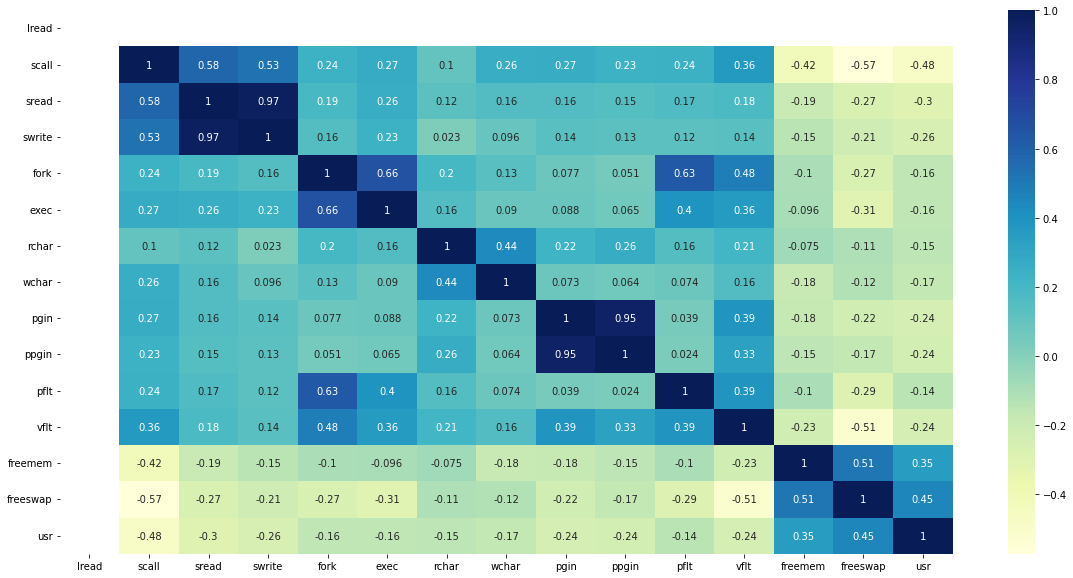

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(),annot=True, cmap='YlGnBu');

In [29]:
df1.usr.describe()

count    675.000000
mean      94.724444
std        5.091849
min        0.000000
25%       93.000000
50%       96.000000
75%       98.000000
max       99.000000
Name: usr, dtype: float64

In [30]:
df.usr.describe()

count    8192.000000
mean       83.968872
std        18.401905
min         0.000000
25%        81.000000
50%        89.000000
75%        94.000000
max        99.000000
Name: usr, dtype: float64

In [31]:
for i in df1.columns:
  count = (df1[i] == 0).sum()
  print(i,count)

lread 675
scall 0
sread 0
swrite 0
fork 9
exec 10
rchar 0
wchar 0
pgin 316
ppgin 316
pflt 2
vflt 0
runqsz 0
freemem 0
freeswap 0
usr 1


In [32]:
list1=[]
for i in df.columns:
  count = (df[i] == 0)
  list1.append(count[count].index)
list1

[Int64Index([   1,    3,    5,    8,    9,   13,   46,   66,   80,   81,
             ...
             8070, 8092, 8106, 8131, 8142, 8147, 8155, 8164, 8167, 8186],
            dtype='int64', length=675),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([ 337,  706,  961, 1840, 2627, 3053, 3711, 4363, 4485, 4678, 4818,
             5052, 5383, 5416, 5926, 6128, 6798, 6934, 7158, 7628, 8049],
            dtype='int64'),
 Int64Index([ 337,  706,  961, 1518, 1840, 2627, 3711, 4363, 4485, 4678, 4818,
             5052, 5383, 5416, 5926, 6128, 6934, 7158, 7319, 7628, 8049],
            dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([   1,    5,    9,   19,   20,   21,   40,   43,   45,   55,
             ...
             8106, 8115, 8117, 8119, 8131, 8142, 8163, 8167, 8179, 8186],
            dtype='int64', length=1220),
 Int64Index([   1,    5,    9,   19,   20,   21,   40,   43,   45,   

In [33]:
list1=[]
for i in df.columns:
  count = (df[i] == 0)
  list1.append(list(count[count].index))

In [34]:

result = {x for l in list1 for x in l}
df2 = df.iloc[list(result)]

In [35]:
df2

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
1,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
3,0,160,12,16,0.2,0.2,NaN,8670.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
5,0,1201,65,61,0.4,0.4,NaN,58703.0,0.0,0.0,28.40,34.40,Not_CPU_Bound,6854,1877461,96
7,21,2799,291,211,0.6,0.4,NaN,259868.0,1.0,1.0,35.40,71.00,CPU_Bound,87,13,0
8,0,264,42,33,0.2,0.2,NaN,10116.0,0.4,0.8,15.63,18.44,Not_CPU_Bound,1374,1749756,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,0,2790,221,89,0.2,0.2,998056.0,17924.0,0.4,0.4,15.60,22.00,Not_CPU_Bound,519,1095728,92
8167,0,3227,387,186,0.2,0.2,111564.0,46429.0,0.0,0.0,16.80,54.80,Not_CPU_Bound,303,1110995,90
8178,5,825,165,129,0.2,0.2,83366.0,53619.0,2.6,3.0,19.60,56.20,CPU_Bound,93,7,0
8179,4,1062,141,126,2.8,1.2,74472.0,6098.0,0.0,0.0,161.80,211.20,Not_CPU_Bound,7349,1864162,93


In [36]:
df5 = df.drop(list(result))

In [37]:
df5

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,2147,79,68,0.2,0.20,40671.0,53995.0,1.60,2.60,16.00,26.40,CPU_Bound,4670,1730946,95
2,15,2162,159,119,2.0,2.40,NaN,31950.0,6.00,9.40,150.20,220.20,Not_CPU_Bound,702,1021237,87
4,5,330,39,38,0.4,0.40,NaN,12185.0,1.00,1.20,37.80,47.60,Not_CPU_Bound,633,1760253,90
6,1,5744,168,190,0.2,0.20,NaN,189975.0,0.60,0.60,27.40,28.60,Not_CPU_Bound,312,1013458,89
10,4,1983,191,152,0.8,0.80,NaN,170579.0,1.20,1.60,65.00,65.60,CPU_Bound,1143,1535661,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,16,3009,360,244,1.6,5.81,405250.0,85282.0,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,3116,289,190,0.6,0.60,325948.0,52640.0,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,5180,254,179,1.2,1.20,62571.0,29505.0,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83


In [41]:
df.isnull().sum()

lread         0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [42]:
df['rchar'].fillna(int(df['rchar'].median()), inplace=True)


In [43]:
df['wchar'].fillna(int(df['wchar'].median()), inplace=True)

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.columns

Index(['lread', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar',
       'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap',
       'usr'],
      dtype='object')

In [46]:
#df["swrite_sq"] = np.square(df["swrite"])
#df["rchar_sq"] = np.square(df["rchar"])
#df["wchar_sq"] = np.square(df["wchar"])
#df["pgin_sq"] = np.square(df["pgin"])
df["freeswap_sq"] = np.square(df["freeswap"])


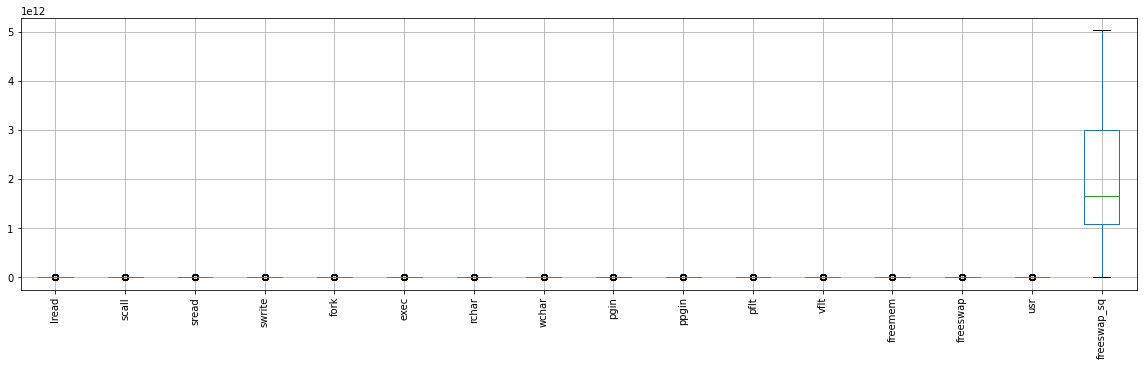

In [47]:
df.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [48]:
no_outlier = ['runqsz']

In [49]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,10)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,90)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [50]:
outlier_list = [x for x in df.columns if x not in no_outlier]

In [51]:
for i in df[outlier_list]:    
    df[i]=treat_outlier(df[i])

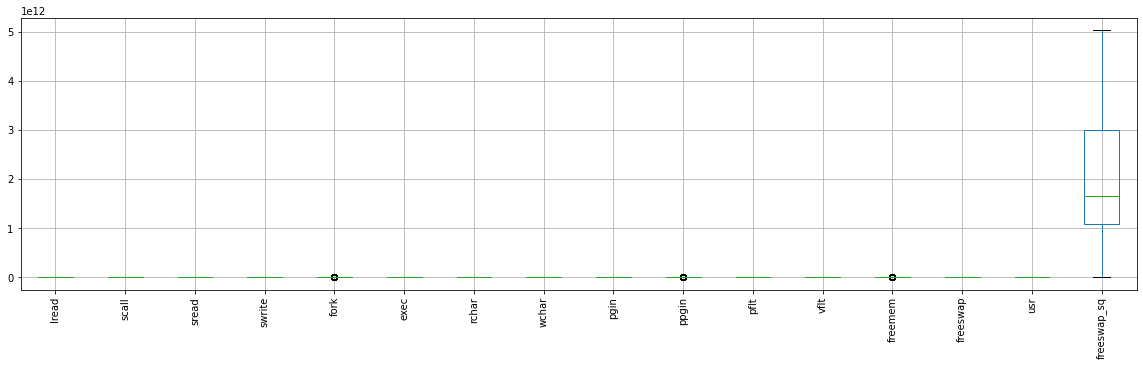

In [52]:
df.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [53]:
df

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr,freeswap_sq
0,1.0,2147.0,79.0,68.0,0.2,0.20,40671.0,53995.0,1.60,2.600,16.00,26.40,CPU_Bound,6507.2,1730946.0,95.0,2996174054916
1,0.0,170.0,18.0,21.0,0.2,0.20,448.0,8385.0,0.00,0.000,15.63,16.83,Not_CPU_Bound,6507.2,1869002.0,97.0,3493168476004
2,15.0,2162.0,159.0,119.0,2.0,2.40,125473.0,31950.0,6.00,9.400,150.20,220.20,Not_CPU_Bound,702.0,1021237.0,87.0,1042925010169
3,0.0,160.0,12.0,16.0,0.2,0.20,125473.0,8670.0,0.20,0.200,15.60,16.80,Not_CPU_Bound,6507.2,1863704.0,98.0,3473392599616
4,5.0,330.0,39.0,38.0,0.4,0.40,125473.0,12185.0,1.00,1.200,37.80,47.60,Not_CPU_Bound,633.0,1760253.0,90.0,3098490624009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,16.0,3009.0,360.0,244.0,1.6,5.81,405250.0,85282.0,22.85,33.787,139.28,270.74,CPU_Bound,387.0,986647.0,80.0,973472302609
8188,4.0,1596.0,170.0,146.0,2.4,1.80,89489.0,41764.0,3.80,4.400,122.40,212.60,Not_CPU_Bound,263.0,1055742.0,90.0,1114591170564
8189,16.0,3116.0,289.0,190.0,0.6,0.60,325948.0,52640.0,22.85,33.787,60.20,219.80,Not_CPU_Bound,400.0,969106.0,87.0,939166439236
8190,32.0,5180.0,254.0,179.0,1.2,1.20,62571.0,29505.0,23.05,24.250,93.19,202.81,CPU_Bound,141.0,1022458.0,83.0,1045420361764


In [54]:
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [55]:
df

,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,freeswap_sq,runqsz_Not_CPU_Bound
0,1.0,2147.0,79.0,68.0,0.2,0.20,40671.0,53995.0,1.60,2.600,16.00,26.40,6507.2,1730946.0,95.0,2996174054916,0
1,0.0,170.0,18.0,21.0,0.2,0.20,448.0,8385.0,0.00,0.000,15.63,16.83,6507.2,1869002.0,97.0,3493168476004,1
2,15.0,2162.0,159.0,119.0,2.0,2.40,125473.0,31950.0,6.00,9.400,150.20,220.20,702.0,1021237.0,87.0,1042925010169,1
3,0.0,160.0,12.0,16.0,0.2,0.20,125473.0,8670.0,0.20,0.200,15.60,16.80,6507.2,1863704.0,98.0,3473392599616,1
4,5.0,330.0,39.0,38.0,0.4,0.40,125473.0,12185.0,1.00,1.200,37.80,47.60,633.0,1760253.0,90.0,3098490624009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,16.0,3009.0,360.0,244.0,1.6,5.81,405250.0,85282.0,22.85,33.787,139.28,270.74,387.0,986647.0,80.0,973472302609,0
8188,4.0,1596.0,170.0,146.0,2.4,1.80,89489.0,41764.0,3.80,4.400,122.40,212.60,263.0,1055742.0,90.0,1114591170564,1
8189,16.0,3116.0,289.0,190.0,0.6,0.60,325948.0,52640.0,22.85,33.787,60.20,219.80,400.0,969106.0,87.0,939166439236,1
8190,32.0,5180.0,254.0,179.0,1.2,1.20,62571.0,29505.0,23.05,24.250,93.19,202.81,141.0,1022458.0,83.0,1045420361764,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   float64
 1   scall                 8192 non-null   float64
 2   sread                 8192 non-null   float64
 3   swrite                8192 non-null   float64
 4   fork                  8192 non-null   float64
 5   exec                  8192 non-null   float64
 6   rchar                 8192 non-null   float64
 7   wchar                 8192 non-null   float64
 8   pgin                  8192 non-null   float64
 9   ppgin                 8192 non-null   float64
 10  pflt                  8192 non-null   float64
 11  vflt                  8192 non-null   float64
 12  freemem               8192 non-null   float64
 13  freeswap              8192 non-null   float64
 14  usr                   8192 non-null   float64
 15  freeswap_sq          

In [57]:
X = df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

In [58]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [59]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [62]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.024506928977067653
The coefficient for scall is -0.0011746843496495765
The coefficient for sread is -0.0016730886691674637
The coefficient for swrite is -0.004504954214326577
The coefficient for fork is -0.6207058686311075
The coefficient for exec is -0.27026619512779315
The coefficient for rchar is -3.6432030480956747e-06
The coefficient for wchar is -4.586830687423607e-06
The coefficient for pgin is -0.06301720801654015
The coefficient for ppgin is -0.06625758894472458
The coefficient for pflt is -0.018376159309175476
The coefficient for vflt is -0.010147203586887994
The coefficient for freemem is 0.00011991722485278946
The coefficient for freeswap is -3.86362974492692e-05
The coefficient for freeswap_sq is 1.3799175617615833e-11
The coefficient for runqsz_Not_CPU_Bound is -1.0144951004646843


In [63]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 123.99332766575114


In [64]:
regression_model.score(X_train, y_train)

0.8521292114344197

In [65]:
regression_model.score(X_test, y_test)

0.8404367346257637

In [66]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

3.3162493558608626

In [67]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

3.354916624945744

In [68]:
import statsmodels.api as sm


In [69]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [70]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     2059.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:02   Log-Likelihood:                -15010.
No. Observations:                5734   AIC:                         3.005e+04
Df Residuals:                    5717   BIC:                         3.017e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  123.9933 

In [71]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    0.000000
lread                    1.305995
scall                    3.008115
sread                    6.005291
swrite                   5.450387
fork                    12.642756
exec                     3.109923
rchar                    2.156012
wchar                    1.577577
pgin                    13.829330
ppgin                   13.691326
pflt                    10.298732
vflt                    13.757375
freemem                  1.898367
freeswap                41.947880
freeswap_sq             41.227046
runqsz_Not_CPU_Bound     1.361609
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [72]:
X_train.corr()

,const,lread,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,freeswap_sq,runqsz_Not_CPU_Bound
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lread,NaN,1.000000,0.333356,0.331716,0.317338,0.376316,0.377657,0.267792,0.170186,0.282002,0.287162,0.381826,0.426082,-0.202433,-0.257614,-0.273102,-0.146255
scall,NaN,0.333356,1.000000,0.758304,0.753709,0.470293,0.452100,0.403348,0.322514,0.342507,0.327477,0.474986,0.546192,-0.414464,-0.457168,-0.453612,-0.252128
sread,NaN,0.331716,0.758304,1.000000,0.871304,0.519775,0.400121,0.587171,0.410255,0.357468,0.351340,0.512676,0.594924,-0.377251,-0.428046,-0.436471,-0.251202
swrite,NaN,0.317338,0.753709,0.871304,1.000000,0.504522,0.349832,0.436218,0.434163,0.332173,0.321426,0.485738,0.558871,-0.394840,-0.418001,-0.422311,-0.233659
fork,NaN,0.376316,0.470293,0.519775,0.504522,1.000000,0.781375,0.398414,0.116229,0.254373,0.240232,0.935962,0.929920,-0.149465,-0.176522,-0.170692,-0.122210
exec,NaN,0.377657,0.452100,0.400121,0.349832,0.781375,1.000000,0.374648,0.139902,0.311375,0.300013,0.771710,0.774655,-0.201267,-0.239520,-0.236469,-0.133314
rchar,NaN,0.267792,0.403348,0.587171,0.436218,0.398414,0.374648,1.000000,0.485690,0.376226,0.400343,0.415791,0.475927,-0.180264,-0.213441,-0.233961,-0.258113
wchar,NaN,0.170186,0.322514,0.410255,0.434163,0.116229,0.139902,0.485690,1.000000,0.238482,0.245682,0.136710,0.165635,-0.166730,-0.158392,-0.180727,-0.254951
pgin,NaN,0.282002,0.342507,0.357468,0.332173,0.254373,0.311375,0.376226,0.238482,1.000000,0.961253,0.269396,0.407388,-0.293885,-0.410511,-0.405933,-0.085198


In [73]:
X_train2 = X_train.drop(["sread"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 4),
)

R-squared: 0.852 
Adjusted R-squared: 0.8516


In [74]:
X_train3 = X_train.drop(["scall"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 4),)

R-squared: 0.8376 
Adjusted R-squared: 0.8371


In [75]:
X_train = X_train.drop(["sread"], axis=1)

In [76]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     2195.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:04   Log-Likelihood:                -15012.
No. Observations:                5734   AIC:                         3.006e+04
Df Residuals:                    5718   BIC:                         3.016e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  124.0040 

In [77]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    0.000000
lread                    1.305937
scall                    2.814304
swrite                   3.197251
fork                    12.637810
exec                     3.103594
rchar                    1.789347
wchar                    1.566564
pgin                    13.829267
ppgin                   13.687039
pflt                    10.296498
vflt                    13.677507
freemem                  1.897256
freeswap                41.925795
freeswap_sq             41.157336
runqsz_Not_CPU_Bound     1.361539
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [78]:
X_train6 = X_train.drop(["ppgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),)

R-squared: 0.851 
Adjusted R-squared: 0.851


In [79]:

X_train55 = X_train.drop(["vflt"], axis=1)
olsmod_55 = sm.OLS(y_train, X_train55)
olsres_55 = olsmod_55.fit()
print(
    "R-squared:",
    np.round(olsres_55.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_55.rsquared_adj, 3),)

R-squared: 0.85 
Adjusted R-squared: 0.849


In [80]:
X_train7 = X_train.drop(["freeswap"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [81]:
X_train = X_train.drop(['ppgin'], axis=1)

In [82]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2342.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:05   Log-Likelihood:                -15023.
No. Observations:                5734   AIC:                         3.008e+04
Df Residuals:                    5719   BIC:                         3.018e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  124.1158 

In [83]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    0.000000
lread                    1.300565
scall                    2.812651
swrite                   3.197040
fork                    12.587871
exec                     3.103149
rchar                    1.749024
wchar                    1.566482
pgin                     1.574588
pflt                    10.295460
vflt                    13.666798
freemem                  1.895192
freeswap                41.909880
freeswap_sq             41.156402
runqsz_Not_CPU_Bound     1.359439
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [84]:

X_train10 = X_train.drop(["fork"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 4),)

R-squared: 0.8504 
Adjusted R-squared: 0.85


In [85]:

X_train11 = X_train.drop(["vflt"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 4),)

R-squared: 0.8491 
Adjusted R-squared: 0.8487


In [86]:

X_train55 = X_train.drop(["pflt"], axis=1)
olsmod_55 = sm.OLS(y_train, X_train55)
olsres_55 = olsmod_55.fit()
print(
    "R-squared:",
    np.round(olsres_55.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_55.rsquared_adj, 4),)

R-squared: 0.8477 
Adjusted R-squared: 0.8474


In [87]:
X_train = X_train.drop(["fork"], axis=1)

In [88]:
olsmod_12 = sm.OLS(y_train, X_train)
olsres_12= olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2501.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:06   Log-Likelihood:                -15044.
No. Observations:                5734   AIC:                         3.012e+04
Df Residuals:                    5720   BIC:                         3.021e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  124.5153 

In [89]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                    0.000000
lread                    1.300461
scall                    2.782830
swrite                   3.078132
exec                     2.908811
rchar                    1.744867
wchar                    1.559444
pgin                     1.508325
pflt                     8.488356
vflt                    10.226870
freemem                  1.895190
freeswap                41.890344
freeswap_sq             41.146189
runqsz_Not_CPU_Bound     1.355621
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [90]:

X_train13 = X_train.drop(["swrite"], axis=1)
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 5),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 4),)

R-squared: 0.84862 
Adjusted R-squared: 0.8483


In [91]:
X_train14 = X_train.drop(["vflt"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),)

R-squared: 0.845 
Adjusted R-squared: 0.844


In [92]:
X_train15 = X_train.drop(["exec"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 4),)

R-squared: 0.8486 
Adjusted R-squared: 0.8482


In [93]:
X_train = X_train.drop(["swrite"], axis=1)

In [94]:
olsmod_16 = sm.OLS(y_train, X_train)
olsres_16= olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2673.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:08   Log-Likelihood:                -15077.
No. Observations:                5734   AIC:                         3.018e+04
Df Residuals:                    5721   BIC:                         3.027e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  124.2579 

In [95]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                    0.000000
lread                    1.300326
scall                    1.894996
exec                     2.688124
rchar                    1.744793
wchar                    1.422002
pgin                     1.507083
pflt                     8.469784
vflt                     9.875182
freemem                  1.878808
freeswap                41.888542
freeswap_sq             41.132612
runqsz_Not_CPU_Bound     1.355523
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [96]:
X_train17 = X_train.drop(["vflt"], axis=1)
olsmod_17 = sm.OLS(y_train, X_train17)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 4),)

R-squared: 0.8413 
Adjusted R-squared: 0.841


In [97]:
X_train = X_train.drop(["vflt"], axis=1)

In [98]:
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                    0.000000
lread                    1.292959
scall                    1.863807
exec                     2.616753
rchar                    1.706297
wchar                    1.406182
pgin                     1.396395
pflt                     2.786933
freemem                  1.878466
freeswap                41.767012
freeswap_sq             41.119907
runqsz_Not_CPU_Bound     1.355132
dtype: float64



In [99]:
X_train18 = X_train.drop(["exec"], axis=1)
olsmod_18 = sm.OLS(y_train, X_train18)
olsres_18 = olsmod_18.fit()
print(
    "R-squared:",
    np.round(olsres_18.rsquared, 4),
    "\nAdjusted R-squared:",
    np.round(olsres_18.rsquared_adj, 4),)

R-squared: 0.8391 
Adjusted R-squared: 0.8388


In [100]:
X_train = X_train.drop(["exec"], axis=1)

In [101]:
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                    0.000000
lread                    1.282687
scall                    1.856310
rchar                    1.704998
wchar                    1.405235
pgin                     1.384808
pflt                     1.550322
freemem                  1.877222
freeswap                41.756891
freeswap_sq             41.117210
runqsz_Not_CPU_Bound     1.354850
dtype: float64



In [102]:
X_train19 = X_train.drop(["freemem"], axis=1)
olsmod_19= sm.OLS(y_train, X_train19)
olsres_19= olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),)

R-squared: 0.838 
Adjusted R-squared: 0.838


In [103]:
X_train = X_train.drop(["freemem"], axis=1)

In [104]:
olsmod_18 = sm.OLS(y_train, X_train)
olsres_18= olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3300.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:15   Log-Likelihood:                -15265.
No. Observations:                5734   AIC:                         3.055e+04
Df Residuals:                    5724   BIC:                         3.062e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  123.0225 

In [105]:
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                    0.000000
lread                    1.282522
scall                    1.825194
rchar                    1.701870
wchar                    1.405113
pgin                     1.384528
pflt                     1.549548
freeswap                41.729879
freeswap_sq             40.662933
runqsz_Not_CPU_Bound     1.327941
dtype: float64



/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [106]:
X_train20 = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)
olsmod_20= sm.OLS(y_train, X_train20)
olsres_20= olsmod_20.fit()
print(
    "R-squared:",
    np.round(olsres_20.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_20.rsquared_adj, 3),)

R-squared: 0.836 
Adjusted R-squared: 0.836


In [107]:
X_train = X_train.drop(["runqsz_Not_CPU_Bound"], axis=1)

In [108]:
vif_series9 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series9))

VIF values: 

const           0.000000
lread           1.280818
scall           1.735002
rchar           1.690075
wchar           1.390710
pgin            1.384343
pflt            1.549174
freeswap       35.970759
freeswap_sq    35.845646
dtype: float64



In [109]:
X_train21 = X_train.drop(["wchar"], axis=1)
olsmod_21= sm.OLS(y_train, X_train21)
olsres_21= olsmod_21.fit()
print(
    "R-squared:",
    np.round(olsres_21.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_21.rsquared_adj, 3),)

R-squared: 0.835 
Adjusted R-squared: 0.835


In [110]:
X_train = X_train.drop(["wchar"], axis=1)

In [111]:
vif_series10 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series10))

VIF values: 

const           0.000000
lread           1.279474
scall           1.675036
rchar           1.421808
pgin            1.381088
pflt            1.511994
freeswap       35.684003
freeswap_sq    35.585913
dtype: float64



In [112]:
X_train22 = X_train.drop(["lread"], axis=1)
olsmod_22= sm.OLS(y_train, X_train22)
olsres_22= olsmod_22.fit()
print(
    "R-squared:",
    np.round(olsres_22.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_22.rsquared_adj, 3),)

R-squared: 0.833 
Adjusted R-squared: 0.833


In [113]:
X_train = X_train.drop(["lread"], axis=1)

In [114]:
vif_series11 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series11))

VIF values: 

const           0.000000
scall           1.662116
rchar           1.420429
pgin            1.363418
pflt            1.418468
freeswap       35.344028
freeswap_sq    35.075101
dtype: float64



In [115]:
olsmod_19 = sm.OLS(y_train, X_train)
olsres_19= olsmod_19.fit()
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     4766.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:26   Log-Likelihood:                -15357.
No. Observations:                5734   AIC:                         3.073e+04
Df Residuals:                    5727   BIC:                         3.077e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         120.4534      0.614    196.220      

In [116]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_19.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_19.resid.values  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,91.0,90.896583,0.103417
1,94.0,94.281051,-0.281051
2,72.0,75.599400,-3.599400
3,83.0,83.972168,-0.972168
4,94.0,97.759190,-3.759190


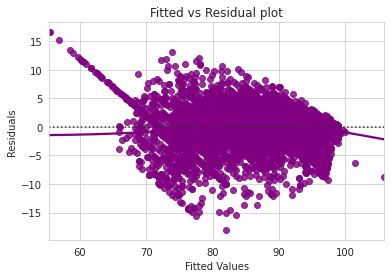

In [117]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

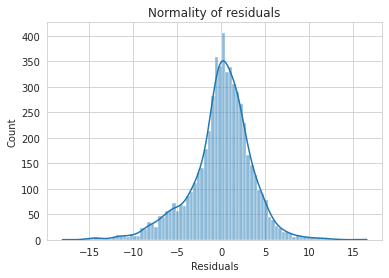

In [118]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

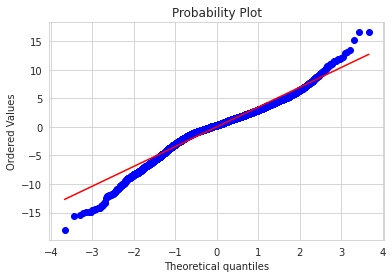

In [119]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [120]:
stats.shapiro(df_pred["Residuals"])

/usr/local/lib/python3.8/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9643259644508362, pvalue=2.0139986354787518e-35)

In [121]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [122]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.0134765045113883), ('p-value', 0.3602032426113956)]

In [123]:
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     4766.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:03:59   Log-Likelihood:                -15357.
No. Observations:                5734   AIC:                         3.073e+04
Df Residuals:                    5727   BIC:                         3.077e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         120.4534      0.614    196.220      

#prediction

In [124]:
# let's check the model parameters
olsres_19.params

const          1.204534e+02
scall         -1.506408e-03
rchar         -5.677930e-06
pgin          -1.908980e-01
pflt          -4.793787e-02
freeswap      -3.614227e-05
freeswap_sq    1.341889e-11
dtype: float64

In [125]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_19.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_19.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_19.params[i], "* (", X_train.columns[i], ")")

usr = 120.45338257913316 + -0.0015064082403879401 * ( scall ) +  -5.677930414405032e-06 * ( rchar ) +  -0.19089803638275435 * ( pgin ) +  -0.04793787181620117 * ( pflt ) +  -3.614227317591907e-05 * ( freeswap ) +  1.341888870757357e-11 * ( freeswap_sq )


In [126]:
X_train.columns

Index(['const', 'scall', 'rchar', 'pgin', 'pflt', 'freeswap', 'freeswap_sq'], dtype='object')

In [127]:
X_test.columns

Index(['const', 'lread', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap',
       'freeswap_sq', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [128]:
X_test2 = X_test.drop(
    ['lread',  'sread', 'swrite', 'fork','wchar', 'ppgin', 'exec','ppgin','vflt','freemem','runqsz_Not_CPU_Bound'], axis=1
)

In [129]:
X_test2.columns

Index(['const', 'scall', 'rchar', 'pgin', 'pflt', 'freeswap', 'freeswap_sq'], dtype='object')

In [130]:
# let's make predictions on the test set
y_pred = olsres_19.predict(X_test2)

In [131]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

3.5227019304440943

In [132]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

3.5621867328993004

In [133]:

# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

2.567840125333411

In [ ]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_test, df_pred["Fitted Values"])
mae1

In [134]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)

LinearRegression()

In [135]:
regression_model1.score(X_train, y_train)

0.8331447690683988

In [136]:
regression_model1.score(X_test2, y_test)

0.8201117417756697

In [ ]:
Xtrain